<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 4 Sprint 2*

# Sprint Challenge - Neural Network Foundations

Table of Problems

1. [Defining Neural Networks](#Q1)
2. [Simple Perceptron](#Q2)
    - Perceptron
    - Multilayer Perceptron
    - Analyze and Compare
4. [Keras MMP](#Q3)

<a id="Q1"></a>
## 1. Defining Neural Networks 

Write *your own* definitions for the following terms:

- **Neuron:** A node that computes and transmitts information.
- **Input Layer:** Randomized bits of known knowledge to teach a machine patterns to recognize.
- **Hidden Layer:** Hidden layers are the workers of the network, performing computations to tell the model what is right and what is wrong.
- **Output Layer:** The layer containing the learned patterns from the network.
- **Activation Function:** Tells a neuron when to fire.

Explain how back propagation works as if you were explaining it to a five year-old. Use your own words, but feel free to reference external materials for this question. 

- **Answer:** My way of explaining back propagation is, Imagine you have a ball and you want to through is at a mrked spot on the ground, so that it hits the mark, hits the wall then lands in a bucket. After your first throw you know that the ball landed short of the bucket, so you move the marker forward a bit, then try again, moveing the marker forward until you find the spot that lands the ball in the bucket.

Remember our Simple Perceptron Class from Monday. In a simple prediction describe the process of making a prediction. How do you go from inputs to predicted output.

First, you need some inputs of data. Second, those inputs need to be passed through some neurons with an activation function, which is called forward propagation. Third and final the neurons output learned data ready to be applied.

<a id="Q2"></a>
## 2. Simple Perceptron

In this question, you will build two neural networks using Tensorflow Keras. After you build these two models, compare the results of the model.

In [1]:
"""
Our Dataset
"""
import numpy as np

xx, yy = np.meshgrid(np.linspace(-3, 3, 50),
                     np.linspace(-3, 3, 50))
rng = np.random.RandomState(0)

"Use this X & y in the following 2 models"
X = rng.randn(300, 2)
y = np.array(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0), 
             dtype=int)

In [2]:
y.shape

(300,)

### Simple Perceptron
Construct a simple perceptron using Keras. You model should have 1 dense layer with a single neuron and a sigmoid activation function. Your model should be called `model1` and make sure to save the results of your fit statement to a variable called `h1`. 

In [3]:
import tensorflow as tf

model1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(2, activation='sigmoid', input_dim=2)])

model1.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

h1 = model1.fit(X, y, epochs=10,
          validation_split=0.2)

Epoch 1/10
8/8 [==============================] - 0s 19ms/step - loss: 0.7497 - accuracy: 0.4333 - val_loss: 0.7046 - val_accuracy: 0.6000
Epoch 2/10
8/8 [==============================] - 0s 3ms/step - loss: 0.7478 - accuracy: 0.4333 - val_loss: 0.7035 - val_accuracy: 0.6000
Epoch 3/10
8/8 [==============================] - 0s 3ms/step - loss: 0.7461 - accuracy: 0.4333 - val_loss: 0.7024 - val_accuracy: 0.6000
Epoch 4/10
8/8 [==============================] - 0s 3ms/step - loss: 0.7444 - accuracy: 0.4333 - val_loss: 0.7014 - val_accuracy: 0.6000
Epoch 5/10
8/8 [==============================] - 0s 3ms/step - loss: 0.7429 - accuracy: 0.4333 - val_loss: 0.7003 - val_accuracy: 0.6000
Epoch 6/10
8/8 [==============================] - 0s 4ms/step - loss: 0.7412 - accuracy: 0.4333 - val_loss: 0.6994 - val_accuracy: 0.6000
Epoch 7/10
8/8 [==============================] - 0s 3ms/step - loss: 0.7397 - accuracy: 0.4333 - val_loss: 0.6985 - val_accuracy: 0.6000
Epoch 8/10
8/8 [=================

### Multi-Layer Perceptron
Now construct a multi-layer perceptron using. Here are some architecture suggestions: 
- 2 Hidden Layers
- 5-32 Neurons in the Hidden Layers
- Your pick of activation function and optimizer
- Incorporate the Callback function below into your model

Your model should be called `model2` and make sure to save the results of your fit statement to a variable called `h2`. 

In [4]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') > .99999):   
            self.model.stop_training = True

In [5]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(2, activation='relu', input_dim=2),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
    ])

model2.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'], )

h2 = model2.fit(X, y, epochs=10,
          validation_split=0.2,
          callbacks=[myCallback()])

Epoch 1/10
8/8 [==============================] - 0s 16ms/step - loss: 0.6874 - accuracy: 0.5125 - val_loss: 0.6807 - val_accuracy: 0.5833
Epoch 2/10
8/8 [==============================] - 0s 3ms/step - loss: 0.6835 - accuracy: 0.5333 - val_loss: 0.6779 - val_accuracy: 0.6333
Epoch 3/10
8/8 [==============================] - 0s 3ms/step - loss: 0.6797 - accuracy: 0.5625 - val_loss: 0.6755 - val_accuracy: 0.6333
Epoch 4/10
8/8 [==============================] - 0s 3ms/step - loss: 0.6763 - accuracy: 0.5958 - val_loss: 0.6732 - val_accuracy: 0.6500
Epoch 5/10
8/8 [==============================] - 0s 3ms/step - loss: 0.6729 - accuracy: 0.6292 - val_loss: 0.6713 - val_accuracy: 0.6500
Epoch 6/10
8/8 [==============================] - 0s 3ms/step - loss: 0.6688 - accuracy: 0.6583 - val_loss: 0.6701 - val_accuracy: 0.6000
Epoch 7/10
8/8 [==============================] - 0s 3ms/step - loss: 0.6646 - accuracy: 0.6792 - val_loss: 0.6683 - val_accuracy: 0.6333
Epoch 8/10
8/8 [=================

### Analyze and Compare

**Before you Start**: You will need to install an additional library for this next segment. Install the package `mlxtend` into the environment you are using for the sprint challenge.


The cells below generate decision boundary plots of your models (`model1` & `model2`). Review the plots.

In [6]:
!pip install mlxtend

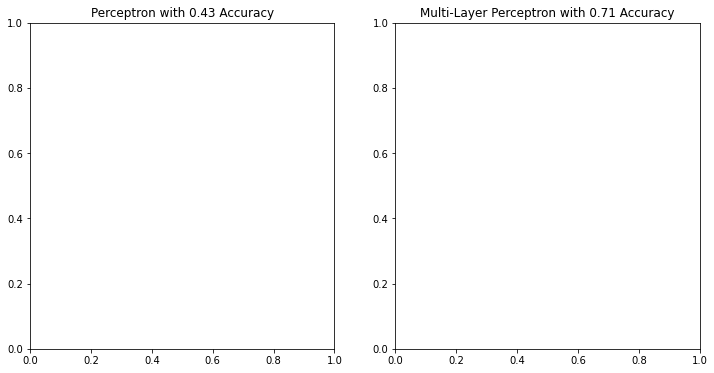

In [29]:
# Do Not change anything in this cell

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

h = .02  # step size in the mesh

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - .2, X[:, 0].max() + .2
y_min, y_max = X[:, 1].min() - .2, X[:, 1].max() + .2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

fig = plt.figure(figsize=(12,6))


for clf, hist, name, grd in zip([model1,model2], [h1, h2],['Perceptron', 'Multi-Layer Perceptron'],[1,2]):

    ax = plt.subplot(1,2, grd)
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    title = f"{name} with {hist.history['accuracy'][-1]:,.2f} Accuracy"
    plt.title(title)

plt.show()

Why does the Perceptron (`model1`) only achieve ~70% accuracy? What is the architectural property of the Multi-Layer Perceptron that allows it more accurately learn the relationship between X and y? 

Why might this property be useful in more complex data such as images?

In [ ]:
# Your Answer Here - Change the Cell to Markdown

## 3. Keras MMP <a id="Q3"></a>

Implement a Multilayer Perceptron architecture of your choosing using the Keras library. Train your model and report its baseline accuracy. Then hyperparameter tune at least two parameters and report your model's accuracy.
Use the Heart Disease Dataset (binary classification)
Use an appropriate loss function for a binary classification task
Use an appropriate activation function on the final layer of your network.
Train your model using verbose output for ease of grading.
Use GridSearchCV or RandomSearchCV to hyperparameter tune your model. (for at least two hyperparameters)
When hyperparameter tuning, show you work by adding code cells for each new experiment.
Report the accuracy for each combination of hyperparameters as you test them so that we can easily see which resulted in the highest accuracy.
You must hyperparameter tune at least 3 parameters in order to get a 3 on this section.

In [25]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/heart.csv')
df = df.sample(frac=1)
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
123,54,0,2,108,267,0,0,167,0,0.0,2,0,2,1
258,62,0,0,150,244,0,1,154,1,1.4,1,0,2,0
70,54,1,2,120,258,0,0,147,0,0.4,1,0,3,1
183,58,1,2,112,230,0,0,165,0,2.5,1,1,3,0
151,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1


In [26]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

def create_model(
    lr=0.01,
    opt=Adam,
    act_func='relu',
    output_act_func='softmax',
    input_dim=784,
    neurons_per_layer=(32, 32, 10)):

    model = Sequential([
        Dense(neurons_per_layer[0], activation=act_func, input_dim=input_dim),
        Dense(neurons_per_layer[1], activation=act_func),
        Dense(neurons_per_layer[2], activation=output_act_func)
    ])

    model.compile(
        optimizer=opt(learning_rate=lr),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

In [28]:
X_train = df.iloc[:,0:13]
y_train = df.iloc[:,13:14]

scaled_X = StandardScaler().fit_transform(X_train, y_train)

model3 = create_model(input_dim=13)

model3.fit(scaled_X, y_train,
          epochs=10,
          validation_split=0.2,
          callbacks=[myCallback()])


Epoch 1/10
8/8 [==============================] - 0s 32ms/step - loss: 1.0750 - accuracy: 0.6942 - val_loss: 0.3952 - val_accuracy: 0.8525
Epoch 2/10
8/8 [==============================] - 0s 4ms/step - loss: 0.4226 - accuracy: 0.8140 - val_loss: 0.3486 - val_accuracy: 0.8525
Epoch 3/10
8/8 [==============================] - 0s 3ms/step - loss: 0.3646 - accuracy: 0.8430 - val_loss: 0.3904 - val_accuracy: 0.7705
Epoch 4/10
8/8 [==============================] - 0s 3ms/step - loss: 0.3387 - accuracy: 0.8554 - val_loss: 0.3740 - val_accuracy: 0.8525
Epoch 5/10
8/8 [==============================] - 0s 3ms/step - loss: 0.3223 - accuracy: 0.8430 - val_loss: 0.3358 - val_accuracy: 0.8525
Epoch 6/10
8/8 [==============================] - 0s 3ms/step - loss: 0.2985 - accuracy: 0.8636 - val_loss: 0.3522 - val_accuracy: 0.8361
Epoch 7/10
8/8 [==============================] - 0s 3ms/step - loss: 0.2688 - accuracy: 0.8843 - val_loss: 0.3438 - val_accuracy: 0.8361
Epoch 8/10
8/8 [=================